In [124]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [125]:
df =  pd.read_pickle('picklefinal/Females.pkl')

In [126]:
df = df.reset_index(drop=False)

In [127]:
df.drop(["All_Service"], axis = 1, inplace = True)

In [128]:
ID = df.UniqueID

In [129]:
df.head()

,UniqueID,Freq,Sex,Age,Age_Group,Hospital,HType,HRegion,Payer,Insurance_Type,Specific_Service,Category_of_Service
0,00001e984eba85527fd3122056451279,8,Feminino,63.8,Mature Working,HCIS,Large,Lisbon,ALLIANZ,Private,DERMATOLOGIA,EXAMES ESPECIAIS
1,0000219e4b37d2504fb6b8c28e24a2d4,1,Feminino,10.0,Child,ICDT,Clinic,Porto,MÉDIS,Private,SERVIÇOS ESPECIAIS OFTALMOLOGIA,CONSULTA EXTERNA
2,00003e3bc9cdb8bfcc589d9f5ec13251,7,Feminino,68.5,Elderly,HCD,Large,Lisbon,FUTURE HEALTHCARE,Private,OTORRINOLARINGOLOGIA,EXAMES ESPECIAIS
3,0000432d50fb347f8fbe957c7a78a0f5,1,Feminino,32.0,Prime Working,HCD,Large,Lisbon,PARTICULARES,Out-of-Pocket,DERMATOLOGIA,CONSULTA EXTERNA
4,00004badb5eaa7736e0b6423780dc2c0,1,Feminino,57.0,Mature Working,ICDT,Clinic,Porto,ADSE,State,ORTOPEDIA,CONSULTA EXTERNA


### One Hot Encoding

In [83]:
dummy_cols = ['Sex','Age_Group','Hospital','HType','HRegion','Payer','Insurance_Type']
dummies = pd.get_dummies(df, columns=dummy_cols)

In [84]:
dummies.shape

(809848, 64)

In [85]:
dummiesSpecificService = pd.get_dummies(df.Specific_Service).drop(columns = ['-'])
dummies = pd.concat([dummies,dummiesSpecificService],axis = 'columns')
dummies.head(2)

,UniqueID,Freq,Age,Specific_Service,Category_of_Service,Sex_Feminino,Age_Group_Child,Age_Group_Early Working,Age_Group_Elderly,Age_Group_Mature Working,...,URGÊNCIA OBSTETRICIA,URGÊNCIA OFTALMOLOGIA,URGÊNCIA ORTOPEDIA,URGÊNCIA OTORRINOLARINGOLOGIA,URGÊNCIA PEDIATRIA,URGÊNCIA PNEUMOLOGIA,URGÊNCIA PSIQUIATRIA,URGÊNCIA REUMATOLOGIA,URGÊNCIA UROLOGIA,UROLOGIA
0,00001e984eba85527fd3122056451279,8,63.8,DERMATOLOGIA,EXAMES ESPECIAIS,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0000219e4b37d2504fb6b8c28e24a2d4,1,10.0,SERVIÇOS ESPECIAIS OFTALMOLOGIA,CONSULTA EXTERNA,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
dummiesCategory = pd.get_dummies(df.Category_of_Service).drop(columns = ['-'])
dummies = pd.concat([dummies,dummiesCategory],axis = 'columns')

### Drop Unecessary Columns 

In [87]:
dummies.drop(["Specific_Service", "Category_of_Service",'UniqueID'], axis = 1, inplace = True) 

In [88]:
dummies.head(5)

,Freq,Age,Sex_Feminino,Age_Group_Child,Age_Group_Early Working,Age_Group_Elderly,Age_Group_Mature Working,Age_Group_Prime Working,Hospital_CCA,Hospital_CCAL,...,IMUNOHEMOTERAPIA,INTERNAMENTO,Internamento GDHS,MEDICINA DENTARIA,MEDICINA FISICA E REABILITAÇÃO,MEDICINA NUCLEAR,PACOTES,PATOLOGIA CLINICA,SERVIÇOS E TÉCNICAS GERAIS,URGÊNCIAS
0,8,63.8,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,68.5,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,57.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
dummies.shape

(809848, 240)

### PCA 

In [90]:
numerical_data = dummies.select_dtypes(np.number)

In [91]:
dummies.drop(["Freq", "Age"], axis = 1, inplace = True) 

In [92]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data)
numerical_data_normalized = pd.DataFrame(
                    numerical_data_normalized,
                    columns=numerical_data.columns)

In [93]:
dummies = pd.concat([numerical_data_normalized, dummies
                    ], axis=1
)
dummies.head(5)


,Freq,Age,Sex_Feminino,Age_Group_Child,Age_Group_Early Working,Age_Group_Elderly,Age_Group_Mature Working,Age_Group_Prime Working,Hospital_CCA,Hospital_CCAL,...,IMUNOHEMOTERAPIA,INTERNAMENTO,Internamento GDHS,MEDICINA DENTARIA,MEDICINA FISICA E REABILITAÇÃO,MEDICINA NUCLEAR,PACOTES,PATOLOGIA CLINICA,SERVIÇOS E TÉCNICAS GERAIS,URGÊNCIAS
0,0.010417,0.585321,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.091743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.008929,0.628440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.293578,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.522936,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler(with_std=False).fit_transform(dummies)

In [95]:
scaled_data

array([[-2.29538591e-04,  2.01888572e-01,  0.00000000e+00, ...,
        -5.14318736e-02, -1.81515544e-04, -9.96211635e-02],
       [-1.06462053e-02, -2.91689409e-01,  0.00000000e+00, ...,
        -5.14318736e-02, -1.81515544e-04, -9.96211635e-02],
       [-1.71763383e-03,  2.45007838e-01,  0.00000000e+00, ...,
        -5.14318736e-02, -1.81515544e-04, -9.96211635e-02],
       ...,
       [-1.06462053e-02, -6.23316111e-02,  0.00000000e+00, ...,
        -5.14318736e-02, -1.81515544e-04,  9.00378837e-01],
       [ 7.26871281e-02,  1.98963179e-01,  0.00000000e+00, ...,
        -5.14318736e-02, -1.81515544e-04, -9.96211635e-02],
       [-9.15811002e-03, -6.04967487e-02,  0.00000000e+00, ...,
         9.48568126e-01, -1.81515544e-04, -9.96211635e-02]])

In [96]:
scaled_data.shape

(809848, 478)

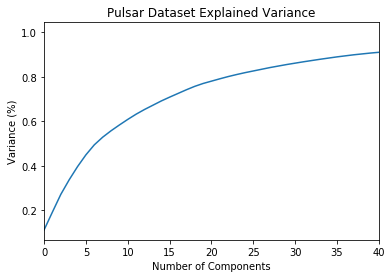

In [97]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.xlim(0,60)
plt.show()

In [98]:
# Implement PCA 
pca = PCA(n_components=50)

# Conduct PCA
data_pca= pca.fit_transform(scaled_data)


In [99]:
pca.explained_variance_ratio_.sum()

0.9360645695407486

In [100]:
data_pca.shape

(809848, 50)

In [101]:
print('Original number of features:', scaled_data.shape[1])
print('Reduced number of features:', data_pca.shape[1])

Original number of features: 478
Reduced number of features: 50


In [116]:
pca_df_females = pd.DataFrame(data_pca)
pca_df_females['UniqueID'] = patients 

In [115]:
pca_df_females.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,UniqueID
0,-0.935321,0.605876,0.542470,0.024586,0.086870,-0.226363,0.930609,0.734923,-0.465477,-0.819672,...,-0.059382,-0.353206,0.052688,0.088856,-0.008054,0.001385,0.145525,-0.023638,-0.034757,00001e984eba85527fd3122056451279
1,0.502877,-0.849809,-1.846510,0.031825,-0.943807,-1.075741,1.022247,-0.088861,0.620151,-0.294036,...,0.094206,0.021788,0.083587,-0.154627,0.022450,0.023476,-0.009608,0.012211,-0.011373,0000219e4b37d2504fb6b8c28e24a2d4
2,-1.174355,0.699772,0.553055,0.286188,0.277348,-0.320467,1.027473,-0.145580,-1.512767,0.506351,...,-0.018801,-0.453020,0.102978,0.142356,0.060325,-0.035776,0.059123,-0.016424,-0.049995,00003e3bc9cdb8bfcc589d9f5ec13251
3,-0.564890,0.389235,-0.270033,1.885840,0.483092,1.240596,-1.161490,-0.679707,0.034157,0.314908,...,-0.081836,-0.027634,0.002930,0.073495,0.039664,0.009047,-0.035014,0.002466,0.016754,0000432d50fb347f8fbe957c7a78a0f5
4,2.404864,0.112100,-0.559884,0.058265,-1.485400,-0.628419,0.151613,-0.123496,0.197600,0.538332,...,0.080896,-0.141424,0.002030,-0.002078,0.014601,-0.002455,0.085011,-0.223020,0.005805,00004badb5eaa7736e0b6423780dc2c0


In [117]:
pca_df_females.shape

(809848, 51)

### Export the data

In [118]:
pca_df_females.to_pickle("pca_df_females.pkl")